In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

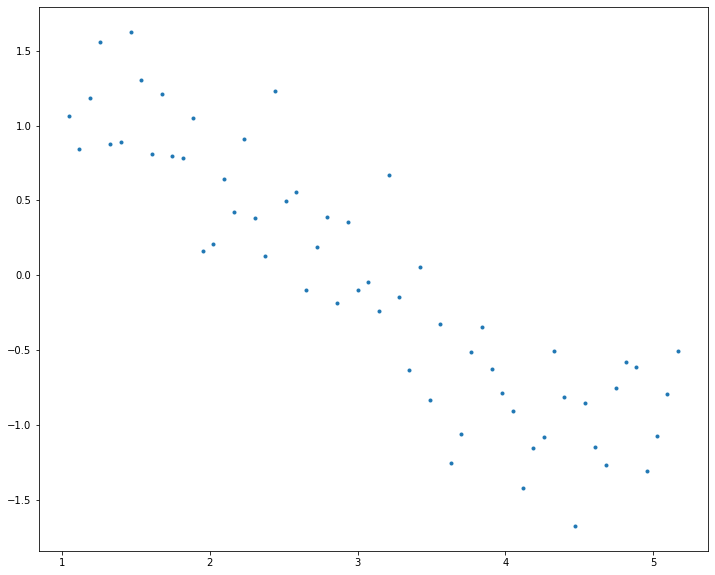

In [10]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])

np.random.seed(42)

y = np.sin(x) + np.random.normal(0,0.4,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [11]:
for i in range(2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i

print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.064711  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  0.843488  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  1.186259  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  1.560268  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  0.876634  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
def linear_regression(data, power, models_to_plot):
    
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

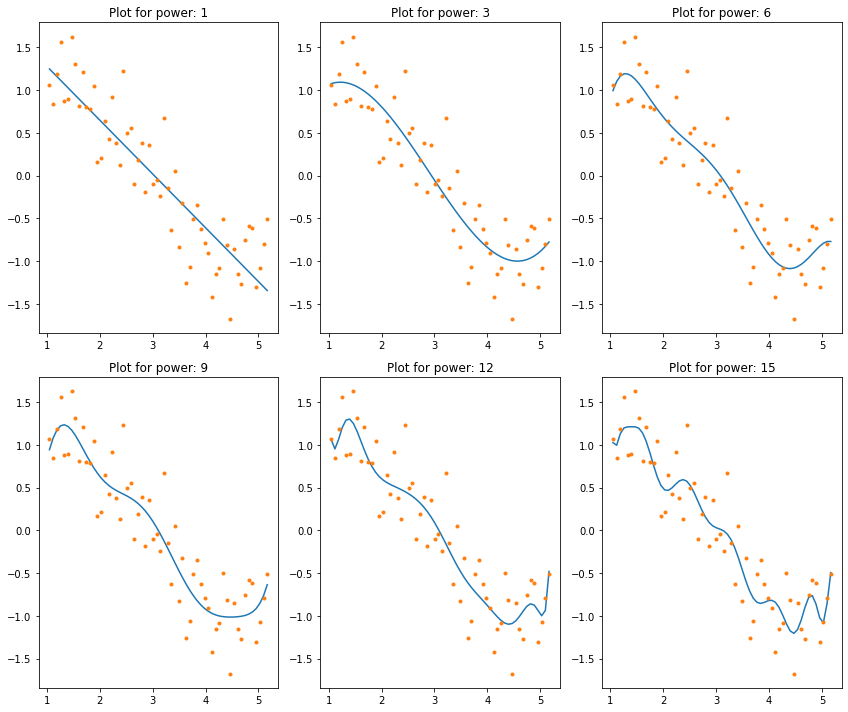

In [5]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [6]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,9,1.9,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,8.4,2.5,-1.1,0.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,7,0.061,1.9,-0.97,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,6.9,2,-1.4,0.87,-0.31,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,6.9,0.3,2.2,-1.9,0.7,-0.14,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,6.6,-17,45,-45,22,-5.7,0.76,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,6.5,-48,1.4e+02,-1.5e+02,91,-31,6,-0.62,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,6.5,-16,28,-0.49,-28,24,-9.7,2.1,-0.23,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,6.5,21,-1.1e+02,2.3e+02,-2.4e+02,1.4e+02,-52,12,-1.7,0.13,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,6.3,6.6e+02,-2.8e+03,5.2e+03,-5.5e+03,3.7e+03,-1.6e+03,4.8e+02,-95,12,-0.87,0.028,NaN,NaN,NaN,NaN,NaN


In [7]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\gerge\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


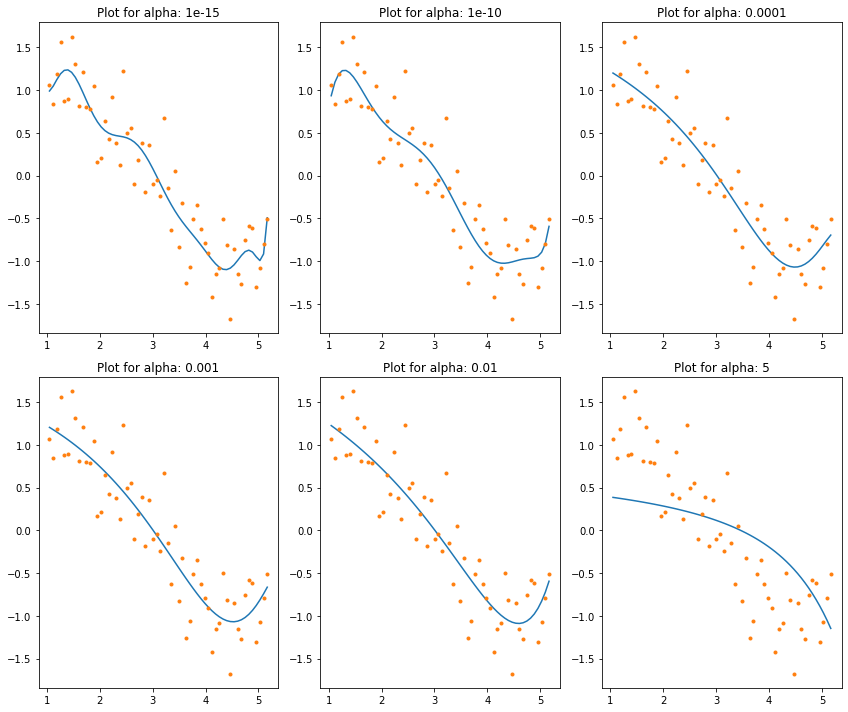

In [8]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [9]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,6.3,1.4e+02,-5.4e+02,8.6e+02,-7.4e+02,3.6e+02,-98,11,1.2,-0.58,0.063,0.008,-0.0025,-0.0005,0.00028,-4.2e-05,2.1e-06
alpha_1e-10,6.4,-23,59,-52,20,-2.1,-0.48,0.06,0.02,-2.1e-05,-0.00071,-9.6e-05,1.4e-05,5.9e-06,1.1e-07,-3e-07,2.7e-08
alpha_1e-08,6.5,-7.9,19,-13,3.2,0.1,-0.08,-0.012,0.00043,0.00042,7.5e-05,4.6e-06,-1.2e-06,-4.3e-07,-7.2e-08,-3e-09,3.2e-09
alpha_0.0001,6.8,1.5,-0.26,-0.044,-0.0059,-0.0015,-0.0003,-2.9e-05,3.6e-06,2.4e-06,6.5e-07,1.3e-07,1.8e-08,1.3e-09,-2e-10,-1.1e-10,-2.8e-11
alpha_0.001,6.8,1.5,-0.23,-0.053,-0.009,-0.0013,-0.00012,4e-06,5.4e-06,1.7e-06,3.9e-07,7.3e-08,1.1e-08,1.2e-09,-1.2e-11,-5.7e-11,-2.2e-11
alpha_0.01,6.9,1.6,-0.33,-0.046,-0.0064,-0.00074,-5.2e-05,4.6e-06,3e-06,8.5e-07,1.9e-07,3.6e-08,5.9e-09,8e-10,7e-11,-5.9e-12,-5.3e-12
alpha_1,12,0.93,-0.16,-0.021,-0.0031,-0.00046,-6.7e-05,-9.1e-06,-1.1e-06,-9.8e-08,2.3e-10,3.3e-09,1.2e-09,3.3e-10,8e-11,1.8e-11,4e-12
alpha_5,22,0.46,-0.063,-0.0089,-0.0014,-0.00024,-3.9e-05,-6.5e-06,-1e-06,-1.7e-07,-2.6e-08,-4e-09,-5.9e-10,-8.2e-11,-1e-11,-9.4e-13,-4.1e-15
alpha_10,26,0.31,-0.039,-0.0057,-0.00095,-0.00016,-2.8e-05,-4.9e-06,-8.5e-07,-1.5e-07,-2.5e-08,-4.4e-09,-7.5e-10,-1.3e-10,-2.2e-11,-3.7e-12,-6.3e-13
alpha_20,31,0.19,-0.023,-0.0034,-0.00059,-0.00011,-1.9e-05,-3.4e-06,-6.1e-07,-1.1e-07,-2e-08,-3.6e-09,-6.5e-10,-1.2e-10,-2.1e-11,-3.9e-12,-7e-13


In [10]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [11]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\gerge\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4152810958447697, tolerance: 0.004362400839118881
  model = cd_fast.enet_coordinate_descent(
C:\Users\gerge\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4148627164941865, tolerance: 0.004362400839118881
  model = cd_fast.enet_coordinate_descent(
C:\Users\gerge\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3735408765986183, tolerance: 0.004362400839118881
  model = cd_fast.enet_coordinate_descent(


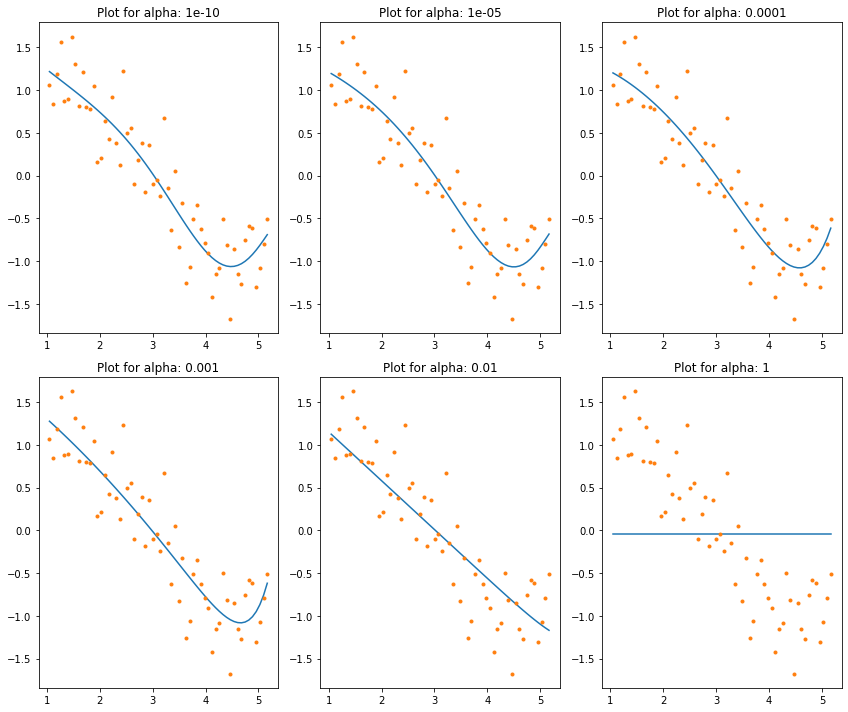

In [12]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [13]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,6.8,1.7,-0.53,0.0046,0.026,-0.0081,-0.0016,-2.7e-05,4.3e-05,1.1e-05,1.6e-06,9.1e-08,-2.3e-08,-9.2e-09,-1.7e-09,-1.2e-10,5.8e-11
alpha_1e-10,6.8,1.7,-0.53,0.0046,0.026,-0.0081,-0.0016,-2.7e-05,4.3e-05,1.1e-05,1.6e-06,9.1e-08,-2.3e-08,-9.2e-09,-1.7e-09,-1.2e-10,5.8e-11
alpha_1e-08,6.8,1.7,-0.52,0.0028,0.026,-0.0081,-0.0016,-2.9e-05,4.3e-05,1.1e-05,1.6e-06,9e-08,-2.3e-08,-9.2e-09,-1.7e-09,-1.2e-10,5.7e-11
alpha_1e-05,6.8,1.5,-0.23,-0.042,-0.011,-0.0019,-0,-0,0,1.4e-06,1.1e-06,6.6e-08,0,0,-0,-0,-3e-11
alpha_0.0001,6.9,1.4,-0.035,-0.15,-0,-0,0,0,0,2.5e-06,3.1e-07,0,0,0,0,-0,-0
alpha_0.001,7.1,1.8,-0.46,-0.049,-0,-0,-0,0,0,0,0,0,0,0,5.6e-10,2.3e-11,0
alpha_0.01,9.1,1.7,-0.57,-0,-0,-0,-0,0,0,0,0,0,0,0,0,0,1.2e-12
alpha_1,44,-0.047,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,44,-0.047,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,44,-0.047,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [14]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      7
alpha_0.0001    11
alpha_0.001     11
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64